In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [118]:
df = pd. read_csv('careem_data_with_time.csv', sep=';', index_col=0)
#df.rename(columns={'Unnamed: 0':'Index'}, inplace=True)

In [138]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Ecoding pick_up and drop_off locations using LabelEncoder

In [120]:
lb = LabelEncoder()
df['pick_up_code'] = lb.fit_transform(df['pick_up'])

In [121]:
#df[['pick_up','pick_up_code']]
df['drop_off_code'] = lb.fit_transform(df['drop_off'])

In [136]:
X=np.array(df['pick_up_code'])
y = np.array(df['drop_off_code'])
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [143]:
pred = knn.predict(X_test.reshape(-1,1))

In [144]:
print(accuracy_score(y_test,pred))

0.16771488469601678


 Accuracy of 17% with K = 3

# Lets draw a plot of K against corresponding error_rate to select a better K

In [126]:
error_rate = []

for i in range(1,40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

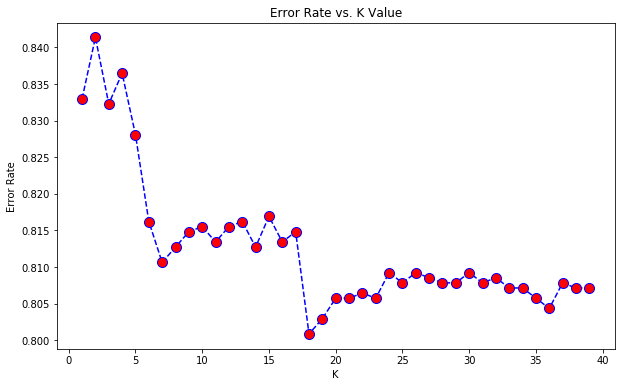

In [127]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>17 the error rate just tends to hover around 0.805-0.808 Let's retrain the model with that and check the classification report/accuracy score! 

In [145]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
pred = knn.predict(X_test.reshape(-1,1))
print(accuracy_score(y_test,pred))

0.19916142557651992


# Accuracy just got a bit better - 20% with K=18

# Lets train KNN model only for user_id = c8c41c4a18, with pick_up as the predictor.

In [129]:
dfusr = df[ df['user_id'] == 'c8c41c4a18' ]

In [146]:
X=np.array(dfusr['pick_up_code'])
y = np.array(dfusr['drop_off_code'])
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
pred = knn.predict(X_test.reshape(-1,1))
print(accuracy_score(y_test,pred))

0.6835443037974683


Somewhat similar accuracy to NB model

In [132]:
error_rate = []

for i in range(1,40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

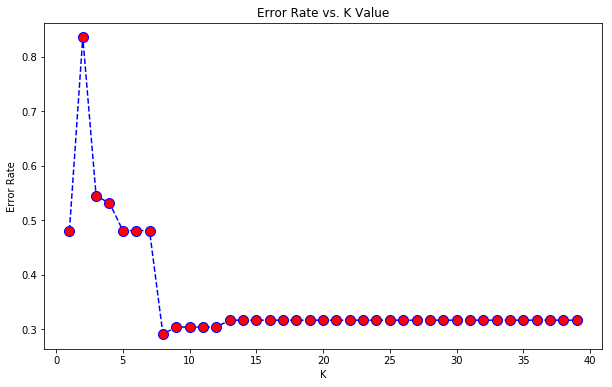

In [133]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [134]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
pred = knn.predict(X_test.reshape(-1,1))
print(accuracy_score(y_test,pred))

0.7088607594936709


# With k=8, Accuracy is whooping 70%